In [2]:
import pandas as pd
import seaborn as sea
import numpy as np
import os

import matplotlib.pyplot as plt
import plotly
import plotly.plotly as py
import plotly.figure_factory as ff
from plotly.graph_objs import *

import tweepy
import itertools
import json
from datetime import datetime

In [4]:
#plotly_key = os.environ["PLOTLY_KEY"]
#mapbox_token = "pk.eyJ1IjoiYW14bW9uZ29vc2UiLCJhIjoiY2plbG1iYml3MXdrYjJxbW80YW53dWE0bCJ9.3VkhNFfkrJISw42FzdDbRA"
#plotly.tools.set_credentials_file(username='amxmongoose', api_key=plotly_key)

Data Used:
    1. U.S. census data
    2. County health data
    3. Air quality data
    
Objectives:
    1. Identify relationship between geographic information and health statistics
    2. Determine is there is a correlation between geographic air quality and health quality
    3. Show healthiest/unhealthiest places in the united states both in air quality and health statistics
    
City by region: How do they compare? Questions:

Which city/region has the best air quality?
Which city/region has the best income (range or median)?
Which city/region has the best health statistics?
Is there a correlation between air quality and income?
Is there a correlation between air quality and health?
Is there a correlation between income and health?
    

In [33]:
health_data_path = os.path.join('Data Sets', 'health_data', 'SUMMARYMEASURESOFHEALTH.csv')
fields = ['CHSI_County_Name','CHSI_State_Name','ALE','All_Death','Health_Status']
health_df = pd.read_csv(health_data_path, skipinitialspace=True, usecols=fields)
health_df = health_df.rename(columns={'CHSI_County_Name':'County','CHSI_State_Name':'State'})

In [94]:
census_data_path = os.path.join('Data Sets', 'acs2015_county_data.csv')
fields = ['State', 'County', 'TotalPop', 'Income', 'IncomePerCap', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'Unemployment']
census_df = pd.read_csv(census_data_path, skipinitialspace=True, usecols=fields)

In [95]:
merged_df_1 = pd.merge(health_df,census_df,on=['County','State'],how='outer')

In [96]:
air_data_path = os.path.join('Data Sets', 'annual_aqi_by_county_2017.csv')
fields = ['State', 'County', 'Max AQI', 'Median AQI','Unhealthy Days']
air_df = pd.read_csv(air_data_path, skipinitialspace=True, usecols=fields)

In [97]:
merged_df = pd.merge(merged_df_1,air_df,on=['County','State'],how='outer')
merged_df = merged_df.dropna(subset = ['Max AQI'])

In [98]:
california_df = merged_df.loc[merged_df['State'] == 'California']
california_df = california_df.reset_index(drop=True)

In [99]:
merged_df.head()

,County,State,ALE,All_Death,Health_Status,TotalPop,Income,IncomePerCap,Poverty,ChildPoverty,...,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,Unemployment,Unhealthy Days,Max AQI,Median AQI
1,Baldwin,Alabama,76.6,856.9,15.4,195121.0,50254.0,27317.0,13.4,19.2,...,0.1,1.0,1.4,3.9,26.4,85953.0,7.5,0.0,108.0,41.0
13,Clay,Alabama,74.9,950.3,-1111.1,13537.0,35327.0,18905.0,16.7,22.5,...,0.6,1.8,0.9,2.1,30.3,5180.0,9.4,0.0,66.0,27.0
16,Colbert,Alabama,75.3,964.4,20.3,54444.0,40576.0,22546.0,17.4,26.1,...,0.2,0.9,0.7,1.5,22.8,21290.0,9.0,0.0,63.0,41.0
24,DeKalb,Alabama,75.1,960.6,22.0,71068.0,38192.0,18411.0,18.7,25.2,...,0.0,0.6,0.9,2.1,22.8,27778.0,7.7,0.0,80.0,40.0
25,Elmore,Alabama,75.2,946.9,15.1,80763.0,53555.0,24381.0,13.6,20.5,...,0.1,0.4,1.2,2.2,28.5,33636.0,8.3,0.0,58.0,38.0


<function matplotlib.pyplot.show>

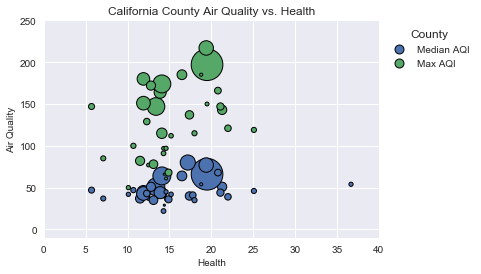

In [70]:
cal_y=[california_df['Median AQI'],california_df['Max AQI']]

def scatter_plot_cal(dfcolumn):
    return plt.scatter(x=california_df['Health_Status'], 
            y=dfcolumn,
            edgecolors = 'black',
            s=california_df['TotalPop']/10000,
            marker = 'o',
            linewidth = 1.0)
for i in cal_y:
    scatter_plot_cal(i)

plt.legend(['Median AQI','Max AQI'],
           title=('County'),
           bbox_to_anchor=(1.3,1), 
           fancybox=True, 
           fontsize=10, 
           markerscale=.4)

plt.title('California County Air Quality vs. Health')
plt.xlabel('Health',fontsize=10)
plt.ylabel('Air Quality',fontsize=10)
plt.xlim(0,40)
plt.ylim(-10,250)        
sea.set()

plt.show

<function matplotlib.pyplot.show>

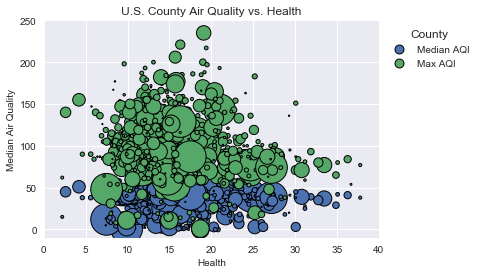

In [71]:
us_y = [merged_df['Median AQI'],merged_df['Max AQI']]

def scatter_plot_us(dfcolumn):
    return plt.scatter(x=merged_df['Health_Status'], 
            y=dfcolumn,
            edgecolors = 'black',
            s=california_df['TotalPop']/10000,
            marker = 'o',
            linewidth = 1.0)
for i in us_y:
    scatter_plot_us(i)
    
plt.legend(['Median AQI','Max AQI'],
           title=('County'), 
           bbox_to_anchor=(1.3,1), 
           fancybox=True, 
           fontsize=10, 
           markerscale=0.4)

plt.title('U.S. County Air Quality vs. Health')
plt.xlabel('Health',fontsize=10)
plt.ylabel('Median Air Quality',fontsize=10)
plt.xlim(0,40)
plt.ylim(-10,250)        
sea.set()

plt.show

<function matplotlib.pyplot.show>

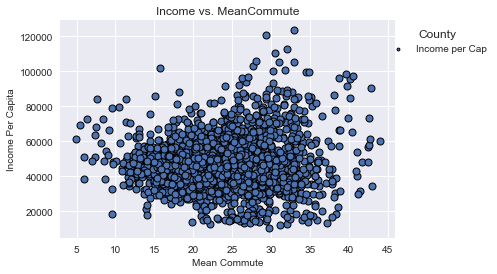

In [100]:
#Income vs. mean commute
plt.scatter(x=merged_df_1['MeanCommute'], 
            y=merged_df_1['Income'],
            edgecolors = 'black',
            #s=california_df['TotalPop']/10000,
            marker = 'o',
            linewidth = 1.0)
plt.legend(['Income per Cap'],
           title=('County'), 
           bbox_to_anchor=(1.3,1), 
           fancybox=True, 
           fontsize=10, 
           markerscale=0.4)

plt.title('Income vs. MeanCommute')
plt.xlabel('Mean Commute',fontsize=10)
plt.ylabel('Income Per Capita',fontsize=10)    
#plt.xlim(0,40)
#plt.ylim(5000,70000)    
sea.set()

plt.show

<function matplotlib.pyplot.show>

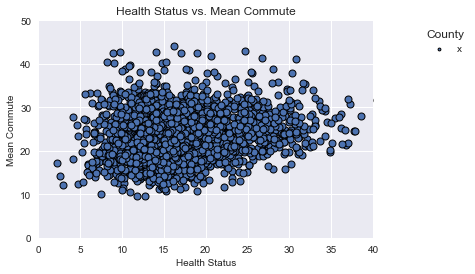

In [101]:
#Health Status vs. Mean Commute
plt.scatter(x=merged_df_1['Health_Status'], 
            y=merged_df_1['MeanCommute'],
            edgecolors = 'black',
            #s=california_df['TotalPop']/10000,
            marker = 'o',
            linewidth = 1.0)
plt.legend(['x'],
           title=('County'), 
           bbox_to_anchor=(1.3,1), 
           fancybox=True, 
           fontsize=10, 
           markerscale=0.4)

plt.title('Health Status vs. Mean Commute')
plt.xlabel('Health Status',fontsize=10)
plt.ylabel('Mean Commute',fontsize=10)    
plt.xlim(0,40)
plt.ylim(0,50)    
sea.set()

plt.show

<function matplotlib.pyplot.show>

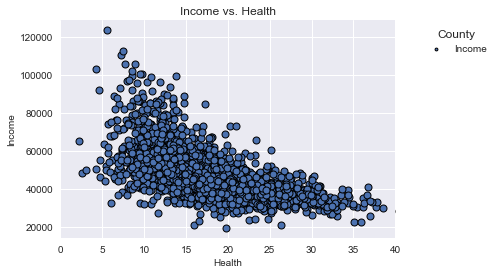

In [102]:
#Income vs Health
plt.scatter(x=merged_df_1['Health_Status'], 
            y=merged_df_1['Income'],
            edgecolors = 'black',
            #s=california_df['TotalPop']/10000,
            marker = 'o',
            linewidth = 1.0)
plt.legend(['Income'],
           title=('County'), 
           bbox_to_anchor=(1.3,1), 
           fancybox=True, 
           fontsize=10, 
           markerscale=0.4)

plt.title('Income vs. Health')
plt.xlabel('Health',fontsize=10)
plt.ylabel('Income',fontsize=10)    
plt.xlim(0,40)
#plt.ylim(5000,70000)    
sea.set()

plt.show

<function matplotlib.pyplot.show>

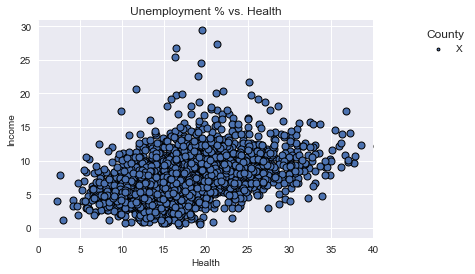

In [103]:
#Health Status vs. Unemployment
plt.scatter(x=merged_df_1['Health_Status'], 
            y=merged_df_1['Unemployment'],
            edgecolors = 'black',
            #s=california_df['TotalPop']/10000,
            marker = 'o',
            linewidth = 1.0)
plt.legend(['X'],
           title=('County'), 
           bbox_to_anchor=(1.3,1), 
           fancybox=True, 
           fontsize=10, 
           markerscale=0.4)

plt.title('Unemployment % vs. Health')
plt.xlabel('Health',fontsize=10)
plt.ylabel('Income',fontsize=10)    
plt.xlim(0,40)
#plt.ylim(5000,70000)    
sea.set()

plt.show

<function matplotlib.pyplot.show>

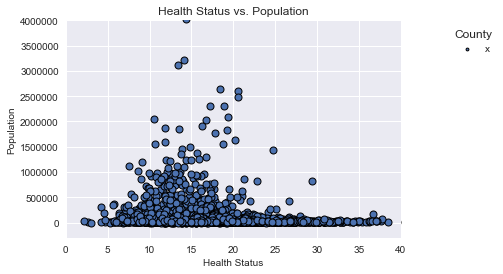

In [107]:
#Population vs Health
plt.scatter(x=merged_df_1['Health_Status'], 
            y=merged_df_1['TotalPop'],
            edgecolors = 'black',
            #s=california_df['TotalPop']/10000,
            marker = 'o',
            linewidth = 1.0)
plt.legend(['x'],
           title=('County'), 
           bbox_to_anchor=(1.3,1), 
           fancybox=True, 
           fontsize=10, 
           markerscale=0.4)

plt.title('Health Status vs. Population')
plt.xlabel('Health Status',fontsize=10)
plt.ylabel('Population',fontsize=10)    
plt.xlim(0,40)
plt.ylim(-300000,4000000)    
sea.set()

plt.show

In [71]:
data = Data([
    Scattermapbox(
        lat=['45.5017'],
        lon=['-73.5673'],
        mode='markers',
        marker=Marker(
            size=14
        ),
        text=['Montreal'],
    )
])

layout = Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_token,
        bearing=0,
        center=dict(
            lat=45,
            lon=-73
        ),
        pitch=0,
        zoom=1,
        style='light'
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig)

In [72]:
fips = ['06021', '06023', '06027',
        '06029', '06033', '06059',
        '06047', '06049', '06051',
        '06055', '06061']
values = range(len(fips))

fig = ff.create_choropleth(fips=fips, values=values)
py.iplot(fig)

In [ ]:
cal_avg_ale = california_df['ALE'].mean()
cal_avg_death = california_df['All_Death'].mean()
cal_avg_health = california_df['Health_Status'].mean()

In [9]:
geo_path = os.path.join('Data Sets', 'uscitiesv1.3.csv')
geo_data = pd.read_csv(geo_path)

# Extract the data we're interested in
lat = geo_data['lat'].values
lon = geo_data['lng'].values
population = geo_data['population'].values
#area = geo_data['area_total_km2'].values